In [51]:
import pandas as pd
import numpy as np
import os
import sys
import warnings
from matplotlib import pyplot as plt
import sklearn.linear_model
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

warnings.filterwarnings('ignore')

In [52]:
DATA_DIR = 'data_sneaker_vs_sandal/'

In [53]:
x_tr_all_NF = np.loadtxt(os.path.join(DATA_DIR, 'x_train.csv'), delimiter=',', skiprows=1)
y_tr_all_N  = np.loadtxt(os.path.join(DATA_DIR, 'y_train.csv'), delimiter=',', skiprows=1)
x_te_MF = np.loadtxt(os.path.join(DATA_DIR, 'x_test.csv'), delimiter=',', skiprows=1)

In [62]:
x_tr_NF = x_tr_all_NF[:10000,:]
y_tr_N  = y_tr_all_N[:10000]
x_va_MF = x_tr_all_NF[10000:,:]
y_va_M  = y_tr_all_N[10000:]
y_va_M.shape

(2000,)

## Experimental Design Notes

We are doing cross validation because we didn't want to split our data

In [49]:
my_max_iter = 1000
my_solver = 'lbfgs'
my_c_grid = np.logspace(-9, 6, 31)

my_scoring = sklearn.metrics.make_scorer(sklearn.metrics.zero_one_loss)

In [26]:
err_tr = []
err_va = []

for C in my_c_grid:
    lr = sklearn.linear_model.LogisticRegression(max_iter=my_max_iter, solver=my_solver, C=C, n_jobs=-1)
    
    scores = sklearn.model_selection.cross_validate(lr, x_tr_NF, y_tr_N, 
                                                    cv=6, scoring=my_scoring, 
                                                    return_train_score=True)
    
    err_va.append(np.mean(scores['test_score']))
    err_tr.append(np.mean(scores['train_score']))

ValueError: x and y must have same first dimension, but have shapes (31,) and (62,)

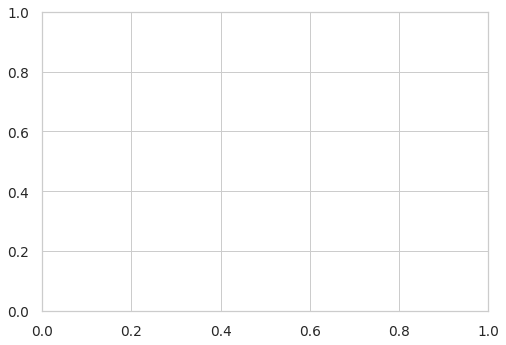

In [45]:
plt.plot(my_c_grid, err_tr, 'r-', label='tr')
plt.plot(my_c_grid, err_va, 'b-', label='va')
plt.xscale('log')
plt.legend(loc='upper right')
plt.suptitle('Error vs C')

62
62


In [43]:
my_best_c = my_c_grid[np.argmin(err_va)]
print(my_best_c)
print(err_va[np.argmin(err_va)])

1.0
0.04083333333333335


In [50]:
my_best_c = 1.0

In [63]:
lr = sklearn.linear_model.LogisticRegression(max_iter=my_max_iter, solver=my_solver, C=my_best_c, n_jobs=-1)

lr.fit(x_tr_NF, y_tr_N)

yhat_tr_proba_N = lr.predict_proba(x_tr_NF)[:,1]
yhat_va_proba_M = lr.predict_proba(x_va_MF)[:,1]

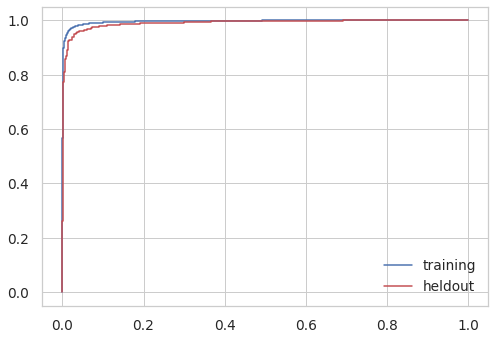

In [66]:
fpr_tr, tpr_tr, _ = sklearn.metrics.roc_curve(y_tr_N, yhat_tr_proba_N)
fpr_va, tpr_va, _ = sklearn.metrics.roc_curve(y_va_M, yhat_va_proba_M)

plt.plot(fpr_tr, tpr_tr, 'b-', label='training')
plt.plot(fpr_va, tpr_va, 'r-', label='heldout')
plt.legend(loc='lower right')

In [113]:
def multiplier(coordinates):
    toReturn = np.copy(coordinates)
    for i in range(10*28, 19*28):
        toReturn[i] *= 10
    return toReturn

def amplify_center_values(x_NF, alpha):
    N, F = x_NF.shape
    
#     x_pos = np.arange(F) % 28
#     y_pos = np.floor(np.arange(F) / 28)
    
#     x_mult = multiplier(x_pos)
#     y_mult = multiplier(y_pos)
    
    x_NF_multiplied = np.copy(x_NF)
    
    for i in range(N):
        x_curr = x_NF[i,:]
#         x_curr = x_curr * alpha * x_mult * y_mult
        x_curr = multiplier(x_curr)
        x_NF_multiplied[i,:] = x_curr
    
    return x_NF_multiplied
        

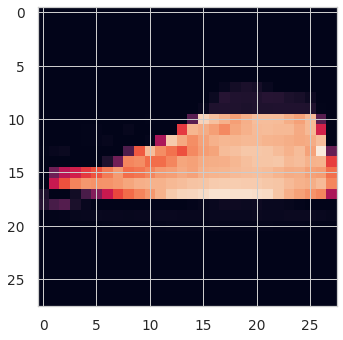

In [118]:
x_tr_NF_amp = amplify_center_values(x_tr_NF, 2)
plt.imshow(x_tr_NF_amp[8,:].reshape((28,28)))

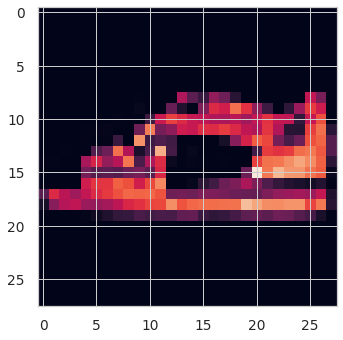

In [117]:
plt.imshow(x_tr_NF[4,:].reshape((28,28)))